### Housing Price Estimation

Here, we will train a machine learning model to predict housing price based on the below given features. We will use multivariate linear regression to train the model.
- **Feature**: Area of house (measured in square foot), Number of bedrooms, Number of bathrooms, Number of stories in the building, Number of parking spaces.
- **Target**: Price of the house (in $)

The feature values will be normalized using `z-score normalization`.
We will follow the `90-10` rule for segregating the dataset into training and validation sets i.e., 90% of the data will be used for training the model and 10% of the dataset will be used for validating the trained model.

In [14]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from models import LinearRegression
from utils import Normalization

The `prepare_data()` function fetches the data from the CSV file, transforms feature columns with string values into numbers using `One-Hot encoding`, and then converts them into the input feature matrix.

In [15]:
def prepare_data():
    df = pd.read_csv('./datasets/housing.csv')
    df = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True, dtype=float)
    total_rows = df.shape[0]
    train_rows = math.floor(total_rows * 0.9)
    training_set = df[:train_rows]
    validation_set = df[train_rows:]
    print(f"There are {training_set.shape[0]} training rows and {validation_set.shape[0]} validation rows.")

    x_cols = ['bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_unfurnished', 'furnishingstatus_semi-furnished']
    x_tr = None
    for x_col in x_cols:
        if x_tr is None:
            x_tr = training_set[x_col].to_numpy(dtype=float)
            x_tr = np.reshape(x_tr, (x_tr.shape[0], 1))
        else:
            temp = training_set[x_col].to_numpy(dtype=float)
            temp = np.reshape(temp, (temp.shape[0], 1))
            x_tr = np.append(x_tr, temp, axis=1)

    x_tr = Normalization.zscore(x_tr)
    z_tr = np.ones((x_tr.shape[0], 1), dtype=float)
    x_tr = np.concatenate((z_tr, x_tr), axis=1)
    y_tr = training_set['price'].to_numpy(dtype=float)
    y_tr = np.reshape(y_tr, (y_tr.shape[0], 1))
    x_val = None
    for x_col in x_cols:
        if x_val is None:
            x_val = validation_set[x_col].to_numpy(dtype=float)
            x_val = np.reshape(x_val, (x_val.shape[0], 1))
        else:
            temp = validation_set[x_col].to_numpy(dtype=float)
            temp = np.reshape(temp, (temp.shape[0], 1))
            x_val = np.append(x_val, temp, axis=1)
    x_val = Normalization.zscore(x_val)
    z_val = np.ones((x_val.shape[0], 1), dtype=float)
    x_val = np.concatenate((z_val, x_val), axis=1)
    y_val = validation_set['price'].to_numpy(dtype=float)
    y_val = np.reshape(y_val, (y_val.shape[0], 1))
    return x_tr, y_tr, x_val, y_val

There are 490 training rows and 55 validation rows.
Model parameters: w = [[4623529.57735815]
 [ 162330.98408894]
 [ 536166.11121966]
 [ 334496.05681645]
 [ 344291.82532321]
 [ 239017.22921544]
 [ 172058.02652306]
 [ 103352.58192247]
 [ 157605.06652188]
 [ 426076.01125495]
 [ 314662.56441072]
 [-154693.43335806]
 [ -70486.24734562]] | Minimum cost value = 1,776,088,634,173.921


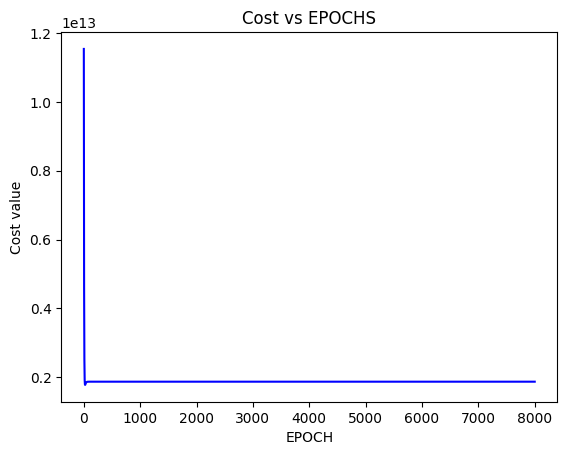

In [16]:
x_train, y_train, x_validate, y_validate = prepare_data()
m, n = x_train.shape

model = LinearRegression(0.1, 8000, 1.2)
cost_values = model.train_gd(x_train, y_train)
print(f"Model parameters: w = {model.w_final} | Minimum cost value = {model.cost_final:,}")

plt.plot(cost_values, 'b')
plt.title("Cost vs EPOCHS")
plt.xlabel("EPOCH")
plt.ylabel("Cost value")
plt.show()

In [17]:
r2_score = model.r2_score(x_train, y_train)
print(f"R2 score for training set is {r2_score}.")
r2_score_val = model.r2_score(x_validate, y_validate)
print(f"R2 score for validation set is {r2_score_val}.")

R2 score for training set is 0.5298520602305488.
R2 score for validation set is -64.26671373863361.
